In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [4]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Lets drop the parental education column, since it doesnt serve any purpose in this project.

In [5]:
df = df.drop(columns=["student_id", "parental_education_level"]) # We aint parenting over here
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4


EDA 

Hypotheses (Project focused and personal interest): 

1) Older stuents tend to spend more time at work/extracurricular activities
2) Netflix and social media hours has the most impact on the exam score and student performance

In [6]:
numerical_cols = [ #excluding exam_score, since its a target variable
    'age',
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'attendance_percentage',
    'sleep_hours',
    'exercise_frequency',
    'mental_health_rating',
]

categorical_cols = [
    'gender',
    'part_time_job',
    'diet_quality',
    'internet_quality',
    'extracurricular_participation'
]

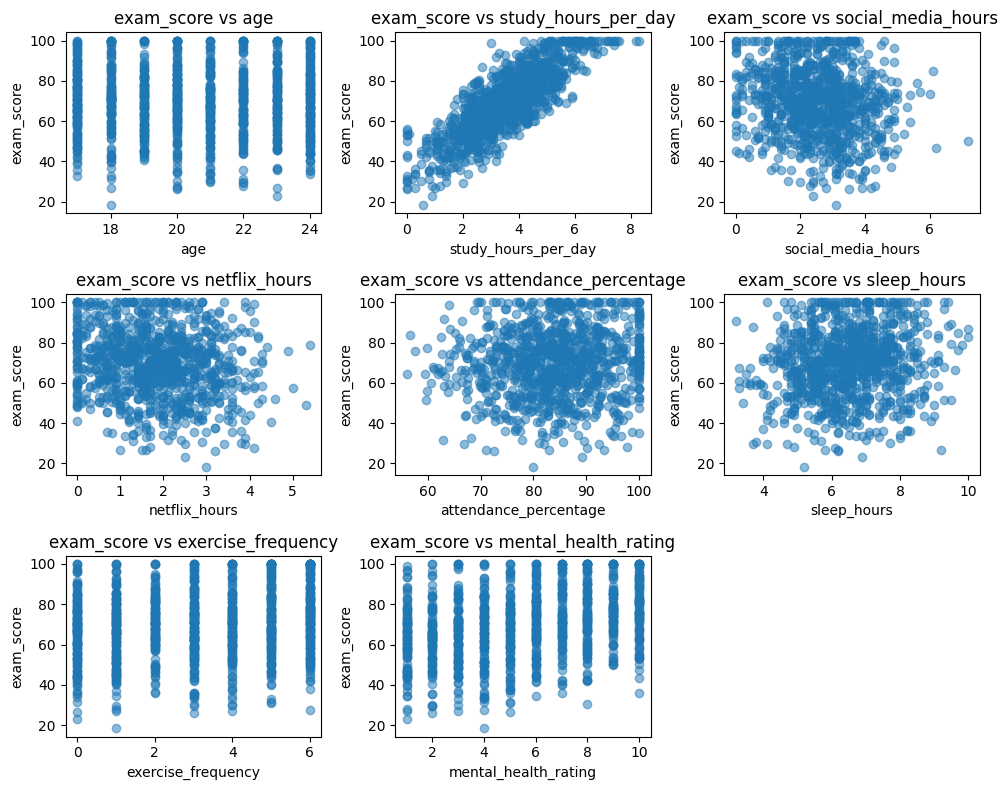

In [7]:
# Plot 3x3 grid of scatter plots: each feature vs exam_score
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    ax.scatter(df[col], df['exam_score'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('exam_score')
    ax.set_title(f'exam_score vs {col}')

# Hide the unused subplot (9th)
if len(numerical_cols) < 9:
    for i in range(len(numerical_cols), 9):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [8]:
# 2. Check what’s actually in each column
for col in ['gender', 'part_time_job', 'extracurricular_participation', 'diet_quality', 'internet_quality']:
    print(col, df[col].unique())

gender ['Female' 'Male' 'Other']
part_time_job ['No' 'Yes']
extracurricular_participation ['Yes' 'No']
diet_quality ['Fair' 'Good' 'Poor']
internet_quality ['Average' 'Poor' 'Good']


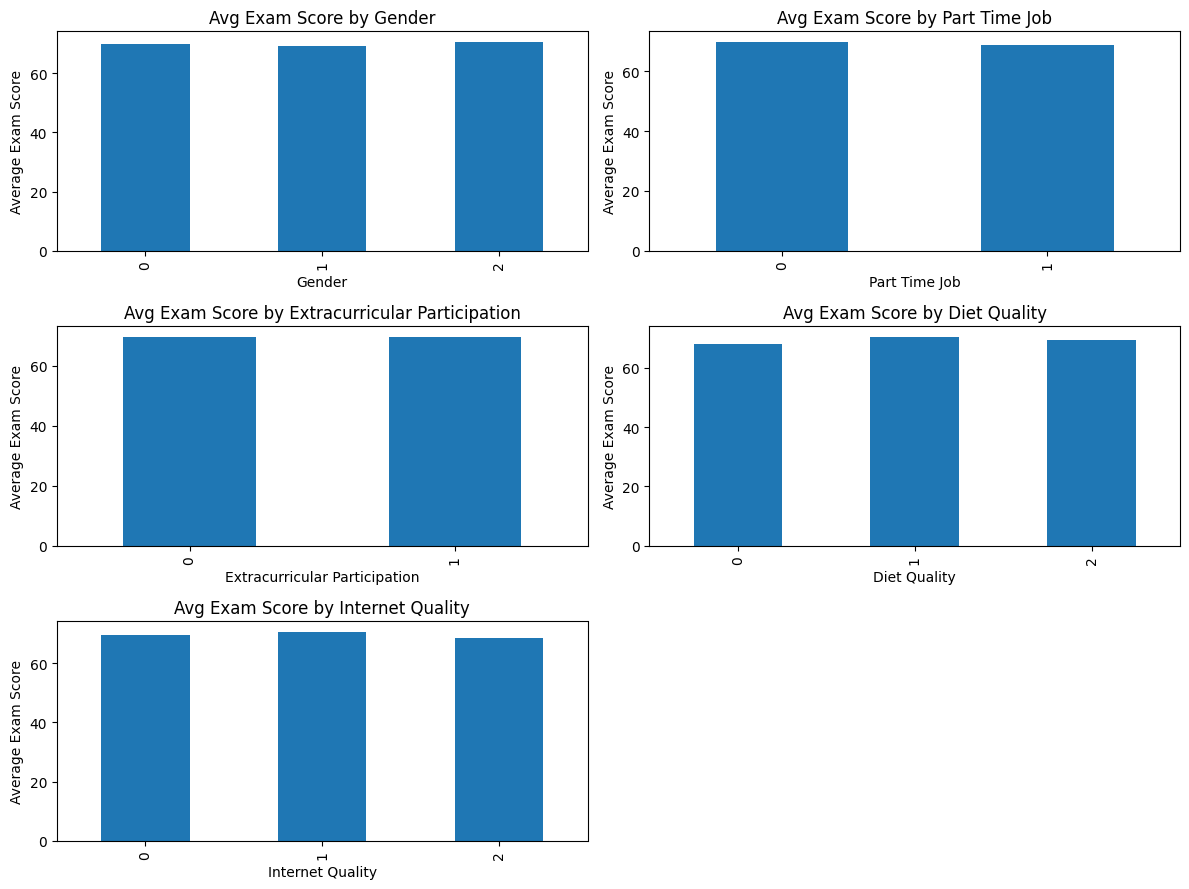

In [9]:
# 2. Build maps that match exactly those uniques
gender_map     = {'Female': 0, 'Male': 1, 'Other': 2}
binary_map     = {'No': 0, 'Yes': 1}
diet_map       = {'Poor': 0, 'Fair': 1, 'Good': 2}
internet_map   = {'Poor': 0, 'Average': 1, 'Good': 2}

# 3. Encode
df_encoded = df.copy()
df_encoded['gender'] = df['gender'].map(gender_map)
df_encoded['part_time_job'] = df['part_time_job'].map(binary_map)
df_encoded['extracurricular_participation'] = df['extracurricular_participation'].map(binary_map)
df_encoded['diet_quality'] = df['diet_quality'].map(diet_map)
df_encoded['internet_quality'] = df['internet_quality'].map(internet_map)

# 4. Plot bar charts of mean exam_score for each categorical variable in a 3x2 grid
categorical_cols = [
    'gender',
    'part_time_job',
    'extracurricular_participation',
    'diet_quality',
    'internet_quality'
]

fig, axes = plt.subplots(3, 2, figsize=(12, 9))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    means = df_encoded.groupby(col)['exam_score'].mean()
    means.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Avg Exam Score by {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Average Exam Score')

# Hide the unused (6th) subplot
if len(categorical_cols) < len(axes):
    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Even though the distribution can be imbalanced, the average score comes down to the same average. In order to confirm feature importance, lets draw a heatmap. 

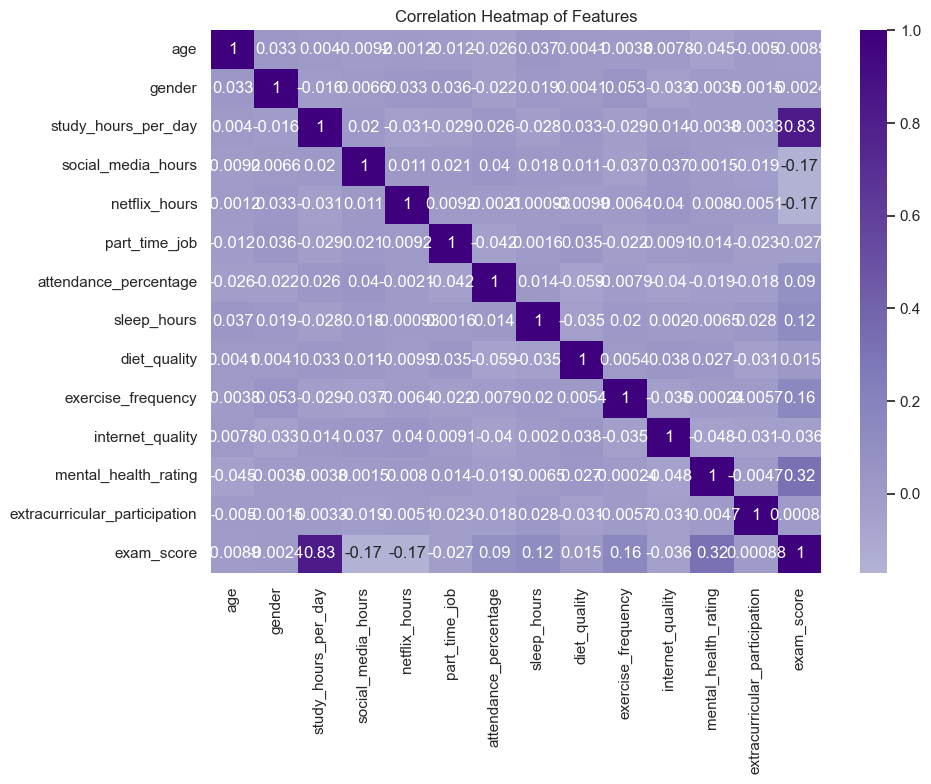

In [10]:
# Compute the correlation matrix
corr = df_encoded.corr()

# Plot a heatmap with seaborn using the "Purples" colormap
sns.set_theme()  # Use seaborn's default theme
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Purples', center=0)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

Lets get to it, mfs. 

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='exam_score')
y = df_encoded['exam_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}


In [13]:
from sklearn.model_selection import cross_validate
import numpy as np

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

results = {}
for name, model in models.items():
    cv_res = cross_validate(
        model, X_train, y_train,
        cv=5,
        scoring=scoring,
        return_train_score=False
    )
    rmse_mean = -cv_res['test_RMSE'].mean()
    rmse_std  =  cv_res['test_RMSE'].std()
    r2_mean   =  cv_res['test_R2'].mean()
    r2_std    =  cv_res['test_R2'].std()
    results[name] = (rmse_mean, rmse_std, r2_mean, r2_std)

# print sorted by mean RMSE
for name, (rmse, rmse_std, r2, r2_std) in sorted(results.items(), key=lambda x: x[1][0]):
    print(
        f"{name:15s} → "
        f"RMSE: {rmse:.2f} ± {rmse_std:.2f}, "
        f"R2: {r2:.3f} ± {r2_std:.3f}"
    )


Ridge           → RMSE: 5.44 ± 0.42, R2: 0.896 ± 0.021
LinearRegression → RMSE: 5.44 ± 0.42, R2: 0.896 ± 0.021
GradientBoosting → RMSE: 5.99 ± 0.42, R2: 0.874 ± 0.025
RandomForest    → RMSE: 6.59 ± 0.60, R2: 0.848 ± 0.034
KNN             → RMSE: 11.05 ± 0.92, R2: 0.579 ± 0.037


Lets desperately try to improve the model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),   # add interactions/polynomials
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'poly__degree':    [1, 2],         # try linear + quadratic
    'ridge__alpha':    [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best R²:", grid.best_score_.round(3))
print("Best params:", grid.best_params_)


Best R²: 0.896
Best params: {'poly__degree': 1, 'ridge__alpha': 1}


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from tqdm.notebook import tqdm
from tqdm_joblib import tqdm_joblib

# 1. Define your base model and parameter grid
rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth':    [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Set up RandomizedSearchCV with verbose + parallel jobs
rnd = RandomizedSearchCV(
    rf,
    param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=2          # shows progress per candidate/fold
)

# 3. Wrap .fit() in a tqdm-joblib context for a Jupyter progress bar
with tqdm_joblib(tqdm(desc="RF hyperparameter search", total=20)):
    rnd.fit(X_train, y_train)

# 4. Results
print("RF best R²:", rnd.best_score_.round(3))
print("RF best params:", rnd.best_params_)



/Users/diego/Documents/Files/coding/upGrade/research/venv/lib/python3.13/site-packages/tqdm_joblib/__init__.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


RF hyperparameter search:   0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..max_depth=5, min_samples_leaf=2, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=2, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=2, n_estimators=200; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=2, n_estimators=200; total time=   0.2s
[CV] END ..max_depth=5, min_samples_leaf=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=20, min_samples_leaf=4, n_estimators=500; total time=   0.8s
[CV] END .max_depth=20, min_samples_leaf=4, n_estimators=500; total time=   0.8s
[CV] END .max_depth=20, min_samples_leaf=4, n_estimators=500; total time=   0.9s
[CV] END .max_depth=20, min_samples_leaf=4, n_estimators=500; total time=   0.8s
[CV] END .max_depth=20, min_samples_leaf=4, n_estimators=500; total time=   0.9s
[CV] END .max_depth=20, min_samples_leaf=2, n_estimators=100; total time=   0.2s
[CV] END .max_depth=20, min_samples_leaf=2, n_e

My desperation only lead to a failure... 

Shockingly the results show that most important features are: study hours(crazy), attendance, sleep, exercise 

👍